In [25]:
import numpy as np
import scipy.stats
import pickle
import time

startTime=time.time()
# Load the saved ARIMA model from the file
with open('mean_Throughput_model.pkl', 'rb') as file:
    mean_loaded_model = pickle.load(file)
with open('std_Throughput_model.pkl', 'rb') as file:
    std_loaded_model = pickle.load(file)



In [53]:
minute=1
fiveSecondFromMinute=minute*12
# Make predictions using the loaded model
prediction_time=int((time.time()-startTime)/5)
print(prediction_time)
mean_pred = mean_loaded_model.predict(prediction_time,prediction_time+fiveSecondFromMinute, typ="levels")/1000000
std_dev_pred = std_loaded_model.predict(prediction_time, prediction_time+fiveSecondFromMinute, typ="levels")/1000000

# Define threshold and time interval
threshold = 3


# Calculate cumulative probabilities for each time step within the interval
cumulative_probabilities = []
for mean, std_dev in zip(mean_pred[:], std_dev_pred[:]):
    probability =1- scipy.stats.norm.cdf(threshold, loc=mean, scale=std_dev)
    cumulative_probabilities.append(probability)

print(cumulative_probabilities)
cumulative_probabilities=np.array(cumulative_probabilities)
cumulative_probabilities = cumulative_probabilities[~np.isnan(cumulative_probabilities)]

# Combine probabilities (e.g., take the maximum)
combined_probability =1- np.prod(cumulative_probabilities)
combined_probability_max=np.max(1-cumulative_probabilities)
meanValuePredicted=np.mean(mean_pred)
print(f"Probability of subceeding 1 time '{threshold} MB/s' of throughput in {minute} minute: {combined_probability*100:.6f}%")
print(f"Max instant Probability of subceeding '{threshold} MB/s' of throughput in {minute} minute: {combined_probability_max*100:.6f}%")
print(f"Mean value predicted in {minute} minute: {meanValuePredicted:.2f} MB/s")

13
[0.8927439432501258, 0.8903752456649358, 0.8874432367443009, 0.8826821594909757, 0.8786874152979715, 0.8745199800916998, 0.8708710231639609, 0.867369979786351, 0.8639161239390647, 0.860474341782602, 0.8570091033333784, 0.853562520683548, 0.8501348475170205]
Probability of subceeding 1 time '3 MB/s' of throughput in 1 minute: 83.291965%
Max instant Probability of subceeding '3 MB/s' of throughput in 1 minute: 14.986515%
Mean value predicted in 1 minute: 8.26 MB/s


Text(0, 0.5, 'Througput (MB/s)')

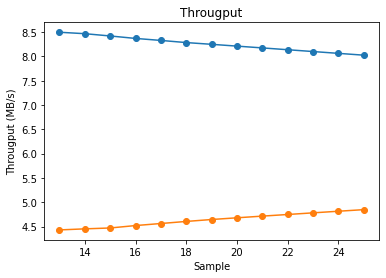

In [54]:
from matplotlib import pyplot as plt


plt.plot(mean_pred, marker='o')
plt.title('Througput')
plt.xlabel('Sample')
plt.ylabel('Througput (MB/s)')
plt.plot(std_dev_pred, marker='o')
plt.title('Througput')
plt.xlabel('Sample')
plt.ylabel('Througput (MB/s)')